# STINTSY Machine Project - Group 5 (S18)
**Members:**

Argamosa, Daniel Cedric

Cabinbin, Pierre Genric

Kua, Miguel Carlo

Sang, Nathan Immanuel



## 1. Introduction to the Problem and Dataset
In this Notebook, we will be exploring and analyzing a dataset about [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/data) from the website Kaggle, which provides insights into the social, demographic, and academic characteristics of secondary school students. The dataset was obtained from a survey conducted on students from Portuguese secondary schools who were enrolled in Math and Portuguese language courses, offering a rich foundation for exploring the factors that influence academic performance.

The primary goal is to examine how various factors, including family background, lifestyle, and alcohol consumption, relate to the culmination of their academic performance, their final grades, becoming a regression-focused study. Afterwards, another test would be finding out how big does alcohol consumption rank between all those factors. So by applying regression analysis, we aim to uncover the extent to which factors like alcohol consumption, family relationships, and study habits predict students' final grades, allowing us to quantify their impact.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.

This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

## 2. Description of the Dataset

The dataset consists of data collected from secondary school students in Portugal having a variety of demographic, academic, lifestyle, and health-related information. Specifically, the dataset surveys students enrolled in Math and Portuguese language courses, providing insights into factors that may influence their academic performance. Key attributes include family background, social habits, lifestyle choices, and alcohol consumption. The purpose of this dataset is to examine how these factors correlate with students' final grades in their courses, offering a comprehensive look at the influences on academic success.

For more context, in Portugal, alcohol consumption is an accepted part of the culture, and drinking is often integrated into social events from a young age. Unlike in some other countries where alcohol consumption is more strictly regulated for minors, Portugal has a tradition of moderate drinking, which is often seen in social gatherings and family events. Furthermore, Portugal’s educational system places a strong emphasis on both academic and social development, with a focus on well-rounded education.This dataset provides a unique opportunity to study these complex interactions, as it includes not only demographic and academic data but also lifestyle and health information. In other words, the nature of this dataset which encompasses factors from family relationships, study habits to alcohol consumption, allows for a deep dive into how different factors impact academic performance that could be used for educational practices in addressing the relationship between lifestyle choices and academic success.

The dataset was created by combining two separate datasets: one for students enrolled in Math and another for students enrolled in Portuguese. After concatenating both, the new dataset has **1044** instances, from 395 Math instances and 649 Portuguese instances. For the structure of the dataset itself, each row represents a single student’s information, while each column represents a feature about the student, such as their demographic details, family background, alcohol consumption habits, academic performance, and more totaling to **33** unique features.

Here’s a breakdown of all the columns:

1. **Personal and Demographic Details:**
   - `school` - The school attended by the student (e.g., "GP" for Gabriel Pereira, "MS" for Mousinho da Silveira).
   - `sex` - Gender of the student ("F" for female, "M" for male).
   - `age` - Age of the student in years.
   - `address` - Type of student’s home location ("U" for urban, "R" for rural).
   - `famsize` - Family size indicator ("LE3" for families with three or fewer members, "GT3" for families with more than three).

2. **Family Background:**
   - `Pstatus` - Parent's cohabitation status ("T" for living together, "A" for apart).
   - `Medu` - Mother's education level (numeric: 0-4).
   - `Fedu` - Father's education level (numeric: 0-4).
   - `Mjob` - Mother's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `Fjob` - Father's job (nominal: "teacher", "health", "services", "at_home", "other").
   - `reason` - Reason for choosing the school ("home", "reputation", "course", "other").
   - `guardian` - Parent/guardian education level (nominal: "mother", "father", "other").

3. **Lifestyle and Personal Preferences:**
   - `traveltime` - Time taken to travel to school (numeric: 1-4).
   - `studytime` - Weekly study time (numeric: 1-4).
   - `failures` - Number of past class failures (numeric: 0-4).
   - `schoolsup` - Extra educational support (binary: "yes" or "no").
   - `famsup` - Family educational support (binary: "yes" or "no").
   - `paid` - Extra paid classes within the course subject (binary: "yes" or "no").
   - `activities` - Participation in extracurricular activities (binary: "yes" or "no").
   - `nursery` - Attended nursery school (binary: "yes" or "no").
   - `higher` - Intention to pursue higher education (binary: "yes" or "no").
   - `internet` - Internet access at home (binary: "yes" or "no").
   - `romantic` - With a romantic relationship (binary: "yes" or "no").

4. **Social and Family Relations:**
   - `famrel` - Quality of family relationships (numeric: 1-5).
   - `freetime` - Amount of free time after school (numeric: 1-5).
   - `goout` - Frequency of going out with friends (numeric: 1-5).

5. **Health and Substance Use:**
   - `Dalc` - Workday alcohol consumption (numeric: 1-5).
   - `Walc` - Weekend alcohol consumption (numeric: 1-5).
   - `health` - Current health status (numeric: 1-5).

6. **Academic Performance:**
   - `absences` - Number of school absences (numeric: 0-93).
   - `G1` - First period grade (numeric: 0-20).
   - `G2` - Second period grade (numeric: 0-20).
   - `G3` - Final grade (numeric: 0-20, output target).

## 3. List of Libraries Required

For this project, the following Python libraries have been utilized:

- `pandas`: For efficient data handling and manipulation, allowing for easy loading, processing, and analysis of the dataset.
- `numpy`: For numerical computations and handling array-type data structures, essential for mathematical operations on data.
- `seaborn`: For data visualization, providing a high-level interface for drawing attractive and informative statistical graphics.
- `matplotlib.pyplot`: For creating static, animated, and interactive visualizations, used for visual exploration of data patterns.
- `scikit-learn`: For implementing and evaluating various machine learning models, such as regression models, classification, and clustering, essential for predictive analysis.


## 4. Data Cleaning

This process will add a feature named ``subject`` to both datasets, 0 for Math, 1 for Portuguese before concatenating them, making it ready to be subjected to more data cleaning techniques

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
student_mat = pd.read_csv('student-mat.csv')  # Replace with your actual file path
student_por = pd.read_csv('student-por.csv')  # Replace with your actual file path

# Add a new column to indicate the source (0 for math, 1 for Portuguese)
student_mat['subject'] = 0  # 0 for Math
student_por['subject'] = 1  # 1 for Portuguese

# Concatenate the datasets
df_student = pd.concat([student_mat, student_por], ignore_index=True)

# Display the shape of the cleaned dataset
print(f"Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): {df_student.shape}")


Shape of Combined Dataset (After Removing Duplicates, excluding 'subject'): (1044, 34)


Because there is a chance that some students may have been enrolled in both Math and Portuguese classes, we will drop duplicate rows according to features based on their personal details and family background

In [2]:

print(f"Shape After Before Duplicates: {df_student.shape}")

# Define the columns based on which duplicates will be dropped
merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob"
]

# Drop duplicate rows based on the selected columns
df_student.drop_duplicates(subset=merge_columns, inplace=True)

print(f"Shape After Dropping Duplicates: {df_student.shape}")

Shape After Before Duplicates: (1044, 34)
Shape After Dropping Duplicates: (613, 34)


Next we would, standardize all entries by removing whitespaces and making all string texts to lowercase for consistency

In [3]:
for col in df_student.select_dtypes(include=['object']).columns:
    df_student[col] = df_student[col].str.strip().str.lower()

print("Features (Before):")
print(df_student.columns.tolist(), "\n")

Features (Before):
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'] 



Then we would label encode all forms of binary data for easier representation

In [4]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'nursery', 'internet', 
               'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic']

label_encoder = LabelEncoder()

for col in binary_cols:
    if col in df_student.columns:
        df_student[col] = label_encoder.fit_transform(df_student[col])

Similarly, we would perform One Hot Encoding to all nominal data, making them become new features with binary values

In [5]:
multi_class_cols = ['Mjob', 'Fjob', 'reason']
df_student = pd.get_dummies(df_student, columns=multi_class_cols, drop_first=True)

Then, we would convert boolean values to integer values, and check if they're all numerical values

In [6]:
df_student = df_student.applymap(lambda x: 1 if x is True else (0 if x is False else x))

all_numeric = all([pd.api.types.is_numeric_dtype(df_student[col]) for col in df_student.columns])
print("All columns are numeric:", all_numeric)

All columns are numeric: True


C:\Users\Daniel\AppData\Local\Temp\ipykernel_22340\3288596315.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_student = df_student.applymap(lambda x: 1 if x is True else (0 if x is False else x))


General Information:

In [7]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613 entries, 0 to 1037
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school             613 non-null    int64
 1   sex                613 non-null    int64
 2   age                613 non-null    int64
 3   address            613 non-null    int64
 4   famsize            613 non-null    int64
 5   Pstatus            613 non-null    int64
 6   Medu               613 non-null    int64
 7   Fedu               613 non-null    int64
 8   guardian           613 non-null    int64
 9   traveltime         613 non-null    int64
 10  studytime          613 non-null    int64
 11  failures           613 non-null    int64
 12  schoolsup          613 non-null    int64
 13  famsup             613 non-null    int64
 14  paid               613 non-null    int64
 15  activities         613 non-null    int64
 16  nursery            613 non-null    int64
 17  higher             6

In [8]:
df_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
0,0,0,18,1,0,0,4,4,1,2,...,0,0,0,0,0,0,1,0,0,0
1,0,0,17,1,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,15,1,0,1,4,2,1,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,16,1,0,1,3,3,0,1,...,1,0,0,0,1,0,0,1,0,0


In [9]:
df_student.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
1005,1,0,19,0,0,0,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
1006,1,0,18,0,0,1,2,2,1,2,...,0,1,0,0,1,0,0,1,0,0
1013,1,0,18,0,1,0,1,2,1,3,...,0,0,0,0,1,0,0,0,0,0
1027,1,0,19,0,0,1,1,1,2,2,...,0,0,0,0,1,0,0,0,0,0
1037,1,0,17,1,0,1,4,3,1,2,...,0,0,1,0,1,0,0,0,1,0


In [10]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,0.862969,1.572594,...,0.381729,0.221860,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.552016,0.747566,...,0.486207,0.415837,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Lastly, we would check for any missing values, and if there were any deal with them appropriately

In [11]:
df_student.isnull().sum()

school               0
sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
guardian             0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
subject              0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
dtype: int64

In [12]:
# df_student.to_csv('df_student.csv', index=False)


## 5. Exploratory Data Analysis


# In this section, we will conduct an Exploratory Data Analysis to gain a deeper understanding of our "Student Alchohol Consumption" dataset. Here are some questions we aim to answer:

# 1. Which features have the strongest impact on the final grade (G3)?
# 2. What is the relationship between alcohol consumption and academic performance?

First, we use visualizations and the describe() method in pandas to summarize the dataset's numerical features, highlighting central tendencies, dispersion, and distribution patterns.

In [13]:
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,0.350734,0.412724,16.827080,0.691680,0.324633,0.866232,2.502447,2.306688,0.862969,1.572594,...,0.381729,0.221860,0.106036,0.039152,0.554649,0.278956,0.053834,0.231648,0.107667,0.221860
std,0.477590,0.492726,1.283168,0.462177,0.468620,0.340681,1.141354,1.099868,0.552016,0.747566,...,0.486207,0.415837,0.308135,0.194114,0.497410,0.448852,0.225873,0.422230,0.310213,0.415837
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Distributions

Histograms reveal the distribution of values for each feature, offering valuable insights.

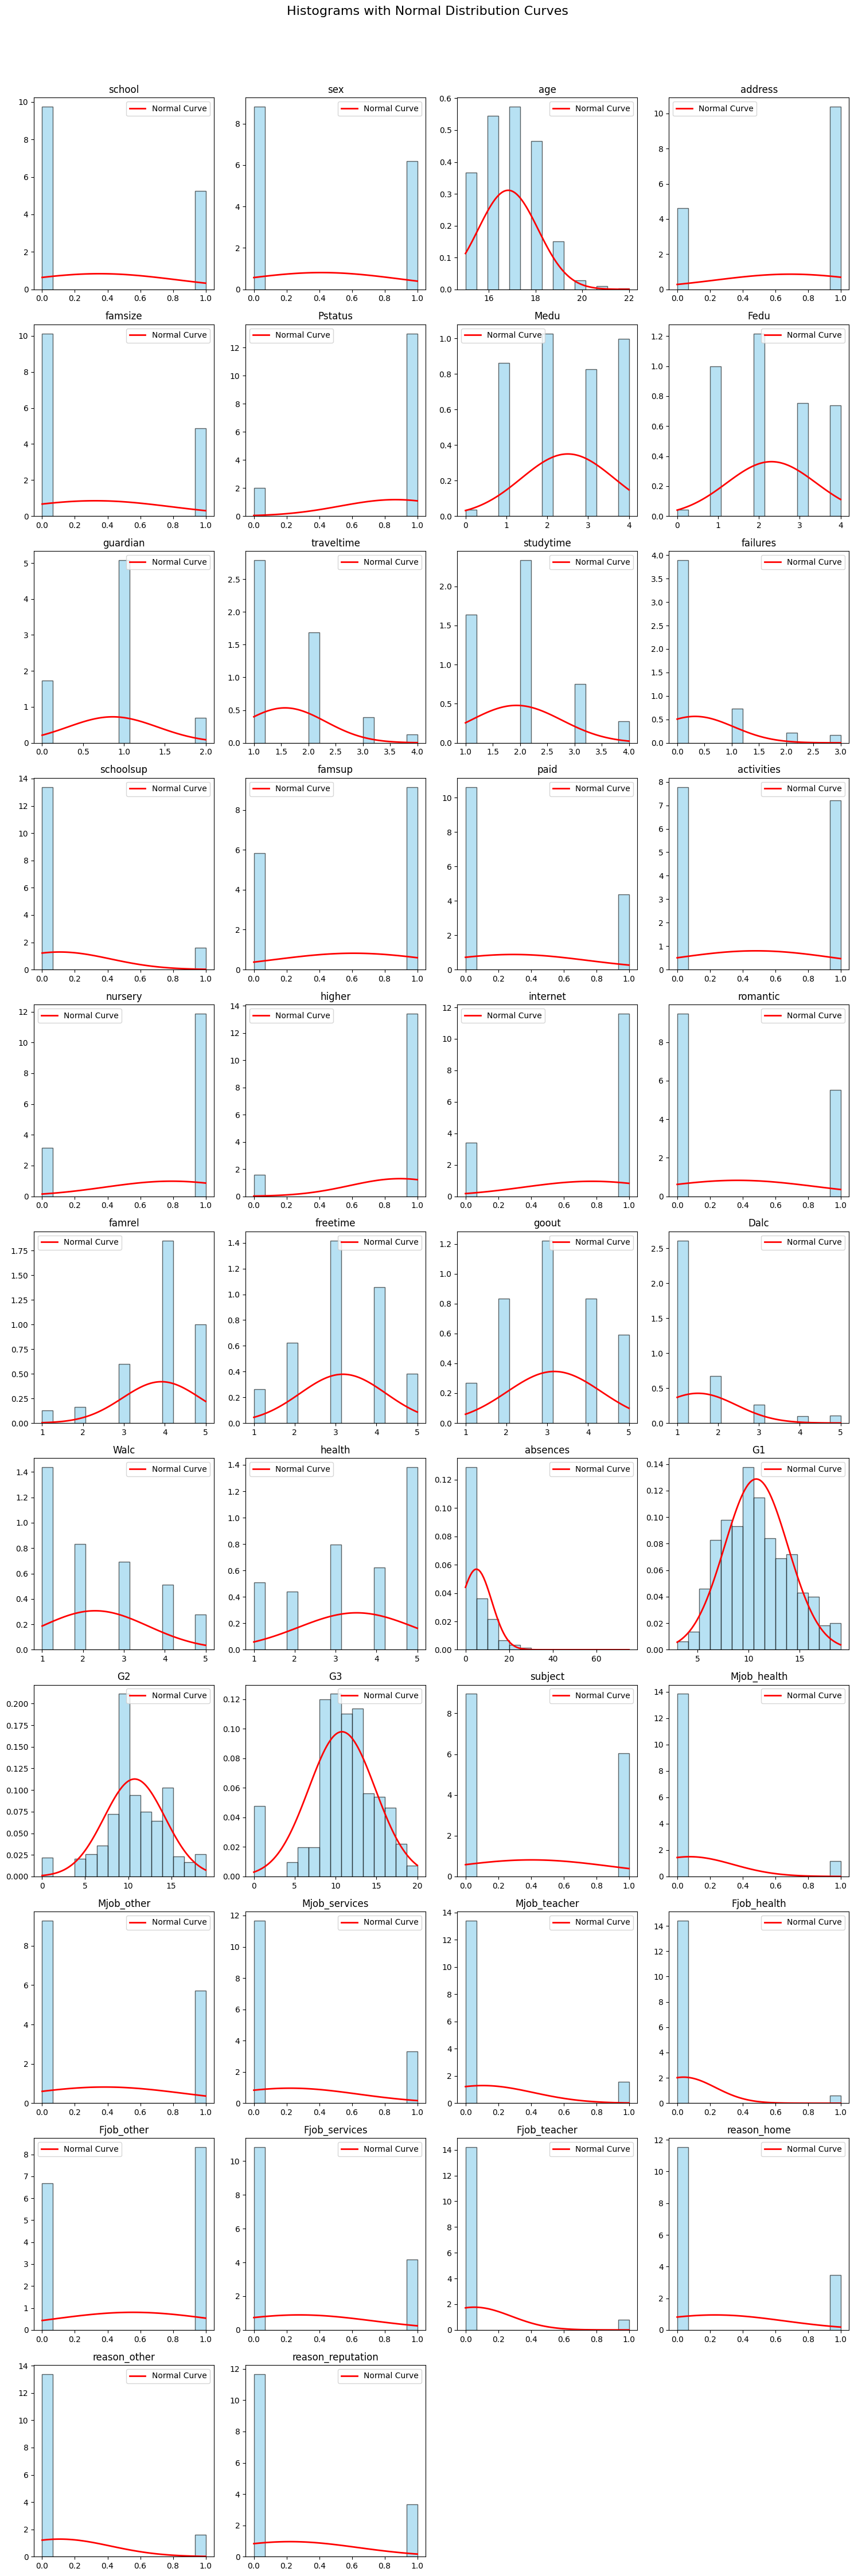

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

n_features = len(df_student.columns)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_student.columns):
    # Plot histogram
    data = df_student[column]
    axes[i].hist(data, bins=15, color='skyblue', edgecolor='black', density=True, alpha=0.6)
    
    # Calculate mean and std dev for normal distribution curve
    mean, std = np.mean(data), np.std(data)
    
    # Generate normal distribution curve
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mean, std)
    
    # Plot normal distribution curve
    axes[i].plot(x, y, color='red', linewidth=2, label='Normal Curve')
    axes[i].set_title(column)
    axes[i].legend()

# Remove unused axes
for j in range(len(df_student.columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Histograms with Normal Distribution Curves', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

We can assess the distribution of each dataset feature by performing a skewness test, which evaluates the asymmetry of the data. A skewness value of 0 signifies a perfectly symmetrical distribution. Positive skewness indicates a right-skewed distribution, while negative skewness suggests a left-skewed distribution.

In [15]:
from scipy.stats import skew
import pandas as pd

pd.set_option('display.max_rows', None)

numeric_columns = df_student.select_dtypes(include=['int64', 'float64']).columns

skewness_results = {column: skew(df_student[column]) for column in numeric_columns}

skewness_df = pd.DataFrame(list(skewness_results.items()), columns=['Feature', 'Skewness'])

print(skewness_df)

pd.reset_option('display.max_rows')

              Feature  Skewness
0              school  0.625591
1                 sex  0.354546
2                 age  0.417901
3             address -0.830145
4             famsize  0.749052
5             Pstatus -2.151752
6                Medu -0.032421
7                Fedu  0.212820
8            guardian -0.055980
9          traveltime  1.254160
10          studytime  0.699714
11           failures  2.352275
12          schoolsup  2.531509
13             famsup -0.451543
14               paid  0.914890
15         activities  0.075094
16            nursery -1.432822
17             higher -2.559176
18           internet -1.305113
19           romantic  0.544398
20             famrel -1.095575
21           freetime -0.197965
22              goout -0.003541
23               Dalc  2.115592
24               Walc  0.618086
25             health -0.471450
26           absences  3.823399
27                 G1  0.322198
28                 G2 -0.378030
29                 G3 -0.768634
30      

Upon analyzing the histograms and skewness results, the distribution of features in the dataset demonstrates a tendency toward right-skewed distributions, characterized by longer right tails. This is supported by positive skewness values for features such as 'famsize', 'traveltime', 'studytime', 'failures', 'schoolsup', 'Dalc', 'Walc', 'absences', 'paid', 'Mjob_health', 'Mjob_services', 'reason_home', 'reason_other', and 'Fjob_teacher'.

Conversely, some features exhibit left-skewed distributions, with longer left tails. These include 'address', 'Pstatus', 'nursery', 'higher', 'internet', 'famrel', and 'health'. Features with skewness values close to zero, such as 'sex', 'age', 'Medu', 'Fedu', 'guardian', 'activities', 'goout', 'G1', and 'G2', suggest relatively symmetrical distributions.



## Correlation Analysis

In [16]:
visual_df = df_student.copy()

# Calculate the correlation matrix and print it
corr_matrix = visual_df.corr()
print(corr_matrix)

                     school       sex       age   address   famsize   Pstatus  \
school             1.000000 -0.060658  0.080463 -0.316176  0.023391  0.017677   
sex               -0.060658  1.000000 -0.036831  0.007210  0.091060  0.066614   
age                0.080463 -0.036831  1.000000 -0.021165  0.009269 -0.008146   
address           -0.316176  0.007210 -0.021165  1.000000  0.070582 -0.085949   
famsize            0.023391  0.091060  0.009269  0.070582  1.000000 -0.229056   
Pstatus            0.017677  0.066614 -0.008146 -0.085949 -0.229056  1.000000   
Medu              -0.233891  0.078103 -0.115743  0.173347 -0.036620 -0.057988   
Fedu              -0.198890  0.055502 -0.120977  0.122032 -0.050822 -0.034239   
guardian          -0.071513 -0.038034  0.333277 -0.012161 -0.004616 -0.158450   
traveltime         0.232914  0.062698  0.007997 -0.315817  0.014244  0.038191   
studytime         -0.133726 -0.230779  0.004441  0.048119 -0.023773 -0.020025   
failures           0.020041 

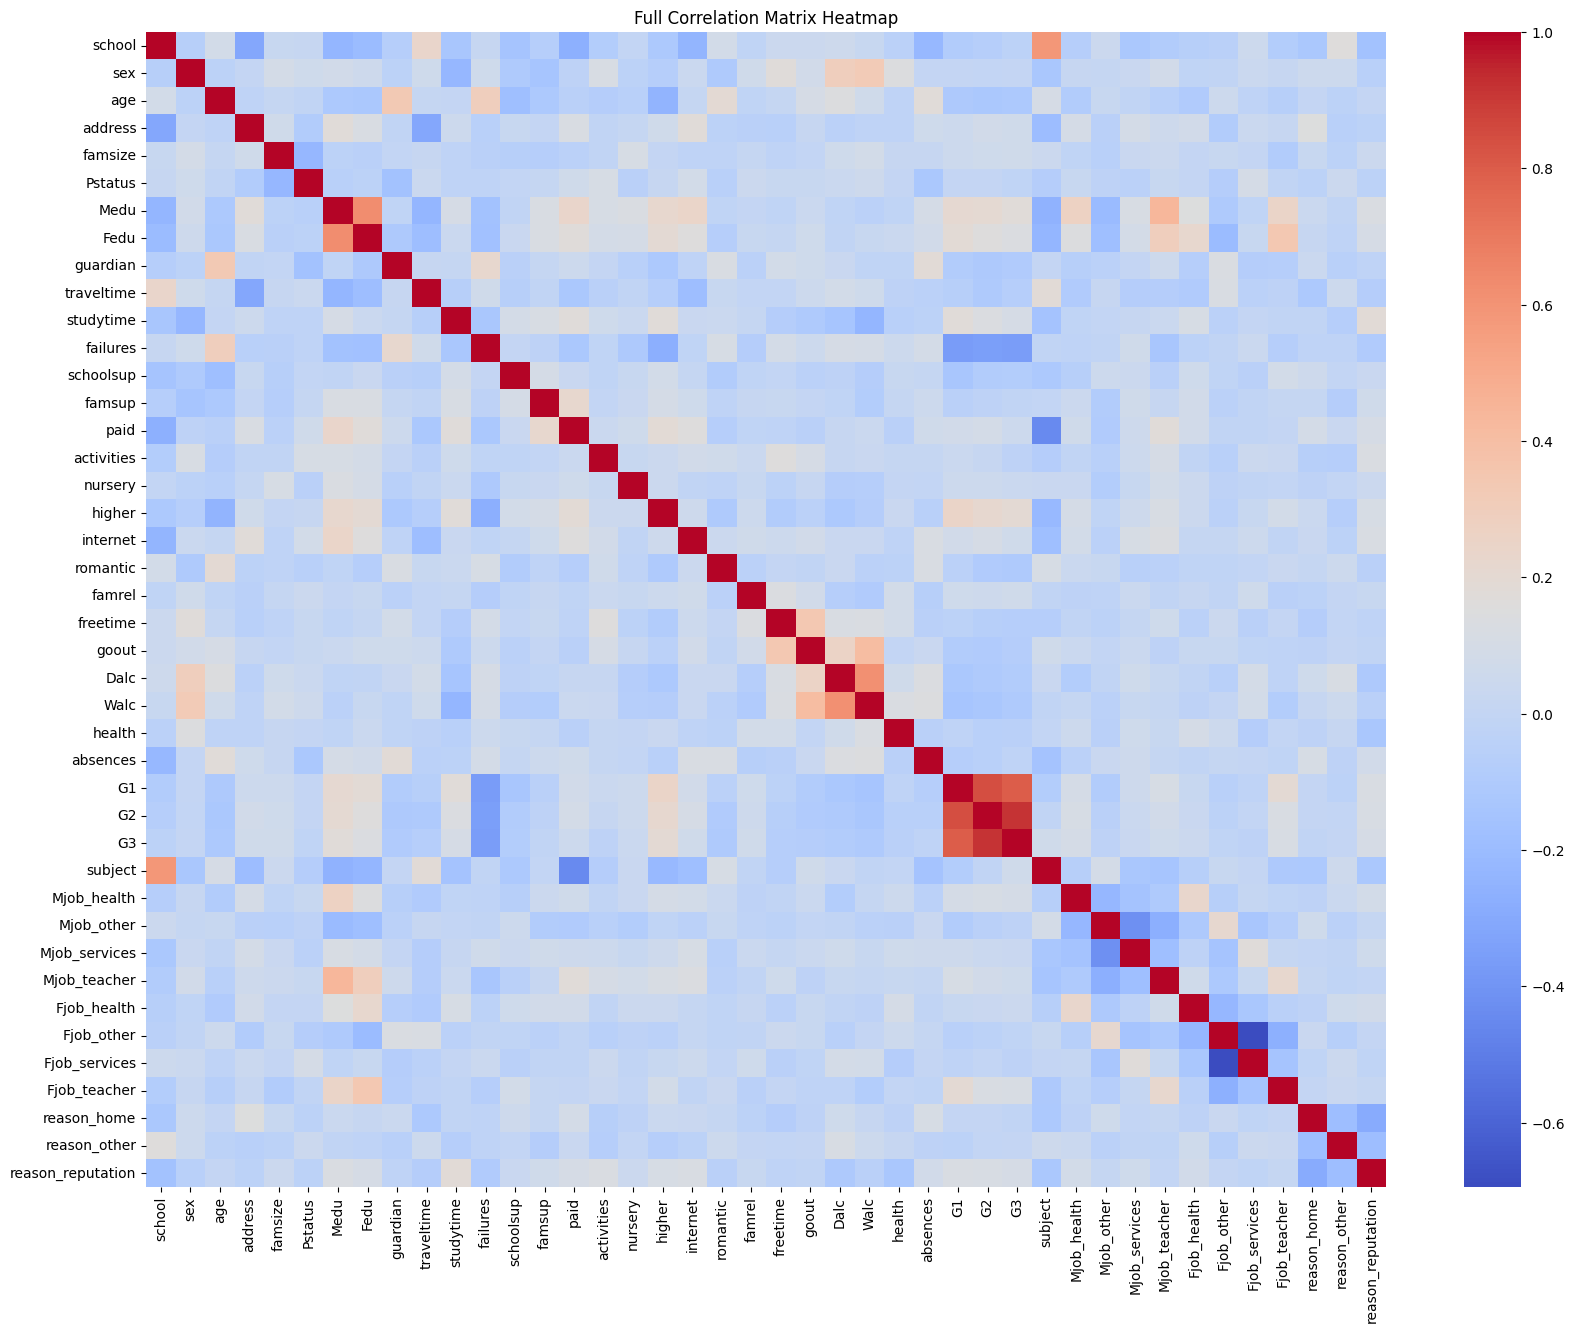

In [17]:
# Build a correlation heat map
numeric_df = df_student.select_dtypes(include=[np.number])

full_correlation_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(full_correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Full Correlation Matrix Heatmap")
plt.show()

significant_correlations = full_correlation_matrix.unstack().reset_index()
significant_correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
significant_correlations = significant_correlations[
    (abs(significant_correlations['Correlation']) > 0.8) & (significant_correlations['Feature 1'] != significant_correlations['Feature 2'])
]

significant_correlations_sorted = significant_correlations.sort_values(by='Correlation', ascending=False)

In [18]:
# Show the correlation values of 'G3' with other features

g3_corr = corr_matrix['G3'].sort_values(ascending=False)
g3_corr

# from IPython.display import display
# display(significant_correlations_sorted)

G3                   1.000000
G2                   0.915417
G1                   0.795185
higher               0.197488
Medu                 0.179252
Fedu                 0.135628
Fjob_teacher         0.119296
studytime            0.102336
reason_reputation    0.100967
Mjob_health          0.093754
famrel               0.071941
famsize              0.071434
internet             0.070422
address              0.069987
subject              0.068596
Mjob_teacher         0.066625
paid                 0.050330
Fjob_health          0.041814
nursery              0.036483
Mjob_services        0.030589
reason_other         0.007014
sex                  0.002689
famsup              -0.008414
reason_home         -0.010406
Fjob_other          -0.016665
Pstatus             -0.017563
absences            -0.021822
activities          -0.026067
Mjob_other          -0.031207
Fjob_services       -0.031814
school              -0.034418
health              -0.046317
freetime            -0.066130
traveltime

In [19]:
significant_correlations_sorted['Pair'] = significant_correlations_sorted.apply(
    lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1
)

unique_pairs = significant_correlations_sorted.drop_duplicates(subset='Pair').drop(columns=['Pair'])

display(unique_pairs)


,Feature 1,Feature 2,Correlation
1205,G2,G3,0.915417
1162,G1,G2,0.844777


In [20]:
visual_df = df_student.copy()

# Calculate the correlation matrix
corr_matrix = visual_df.corr()

# Compute the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Set a threshold for high correlation
threshold = 0.8

# Identify features to drop, keeping the one with the highest correlation to the target
features_to_drop = set()
for column in upper_triangle.columns:
    # Find features highly correlated with the current column
    high_corr_features = upper_triangle.index[upper_triangle[column] > threshold].tolist()
    # Exclude the column itself and add others to the drop list
    features_to_drop.update(high_corr_features)

# Keep the most relevant feature (`G3`) and remove others (`G1`, `G2`)
# We drop G1 as its correlation is close to 0.8
features_to_drop = features_to_drop - {'G3'}

# Drop the selected features
visual_df_dropped = visual_df.drop(columns=features_to_drop)

# Recalculate the correlation matrix for the reduced dataset
corr_matrix_dropped = visual_df_dropped.corr()

# Display results
print("Dropped Features:", features_to_drop)
print("\nNew Correlation Matrix (Reduced Dataset):\n", corr_matrix_dropped)

#subject to change, the new dataset is within corr_matrix_dropped
#needs to add explanation and others stuff and boxplots for the outliers next

Dropped Features: {'G1', 'G2'}

New Correlation Matrix (Reduced Dataset):
                      school       sex       age   address   famsize   Pstatus  \
school             1.000000 -0.060658  0.080463 -0.316176  0.023391  0.017677   
sex               -0.060658  1.000000 -0.036831  0.007210  0.091060  0.066614   
age                0.080463 -0.036831  1.000000 -0.021165  0.009269 -0.008146   
address           -0.316176  0.007210 -0.021165  1.000000  0.070582 -0.085949   
famsize            0.023391  0.091060  0.009269  0.070582  1.000000 -0.229056   
Pstatus            0.017677  0.066614 -0.008146 -0.085949 -0.229056  1.000000   
Medu              -0.233891  0.078103 -0.115743  0.173347 -0.036620 -0.057988   
Fedu              -0.198890  0.055502 -0.120977  0.122032 -0.050822 -0.034239   
guardian          -0.071513 -0.038034  0.333277 -0.012161 -0.004616 -0.158450   
traveltime         0.232914  0.062698  0.007997 -0.315817  0.014244  0.038191   
studytime         -0.133726 -0.230

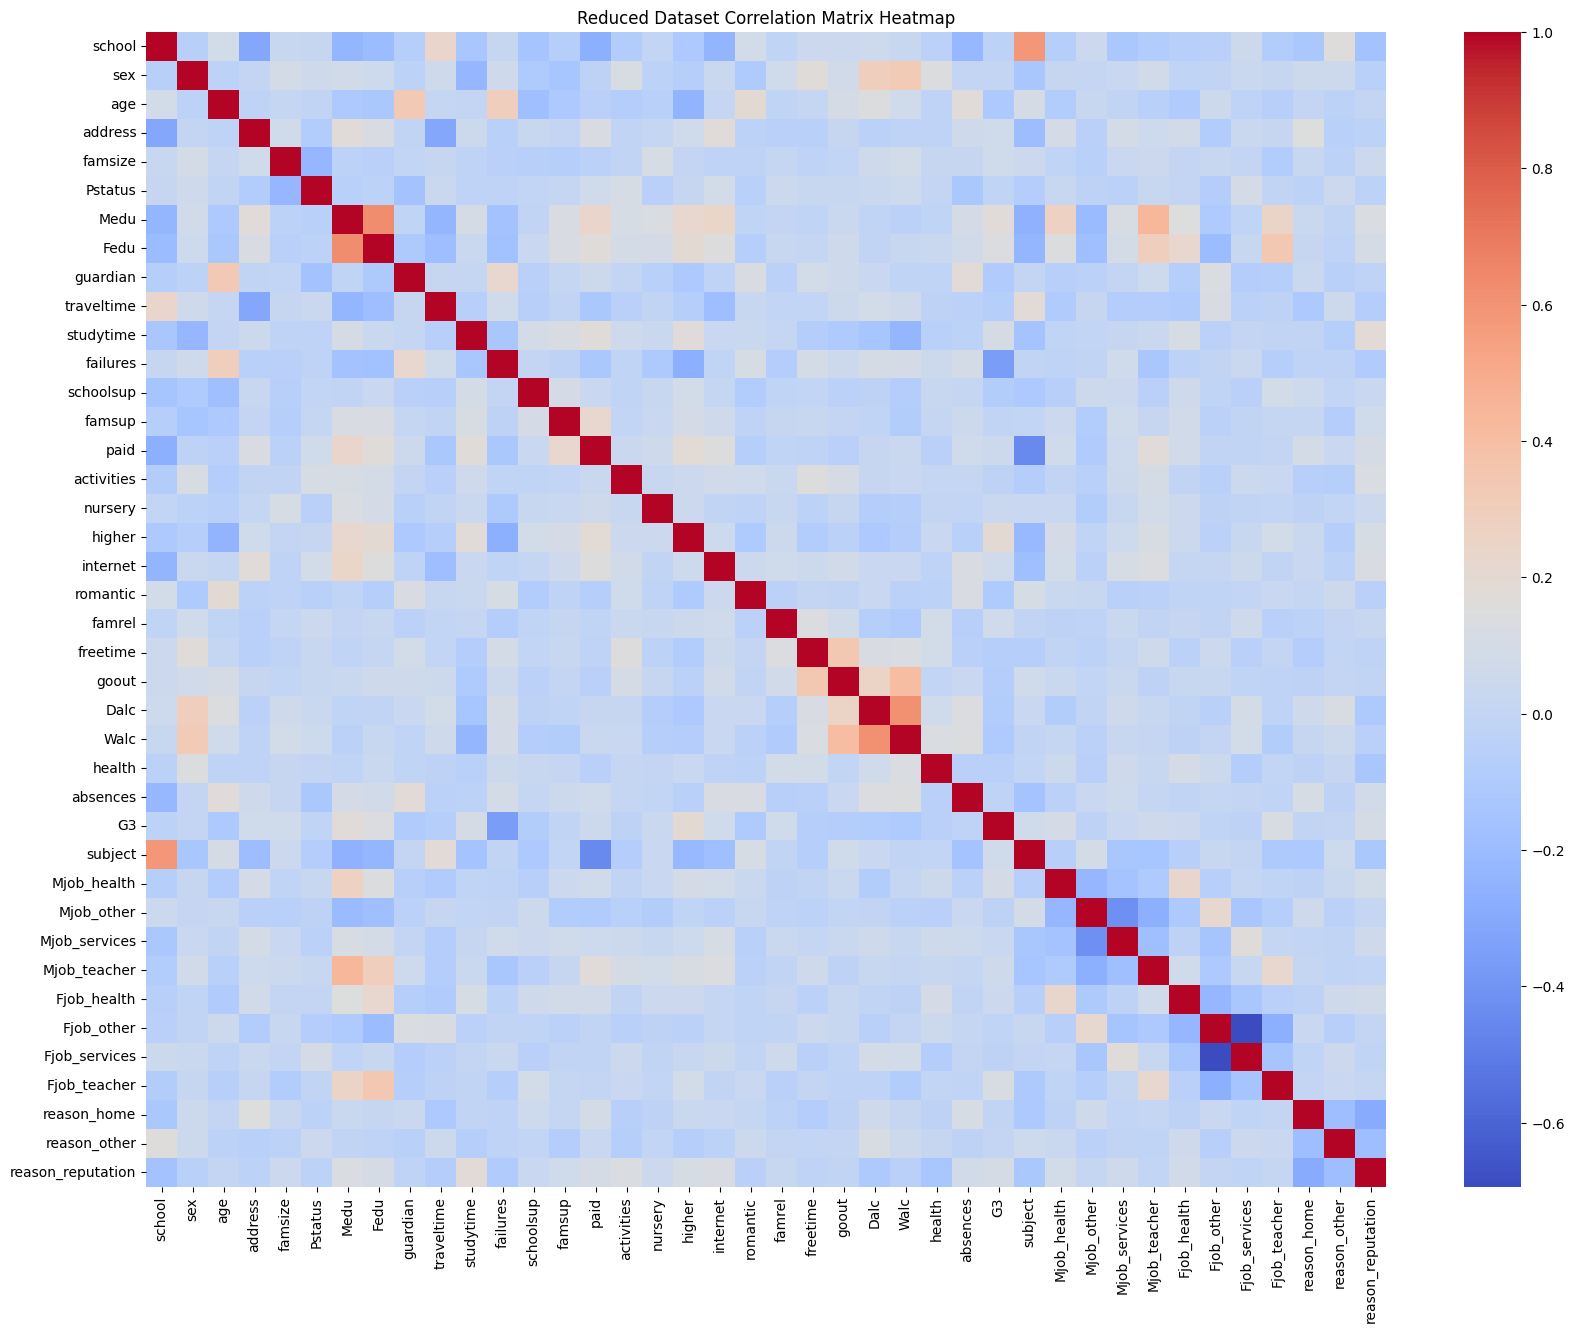

In [21]:
# Select only numeric features from the reduced dataset
numeric_df_dropped = visual_df_dropped.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the reduced dataset
reduced_correlation_matrix = numeric_df_dropped.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(reduced_correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Reduced Dataset Correlation Matrix Heatmap")
plt.show()

# Identify significant correlations
significant_correlations_dropped = reduced_correlation_matrix.unstack().reset_index()
significant_correlations_dropped.columns = ['Feature 1', 'Feature 2', 'Correlation']
significant_correlations_dropped = significant_correlations_dropped[
    (abs(significant_correlations_dropped['Correlation']) > 0.8) & 
    (significant_correlations_dropped['Feature 1'] != significant_correlations_dropped['Feature 2'])
]

# Sort by absolute correlation values
significant_correlations_sorted_dropped = significant_correlations_dropped.sort_values(by='Correlation', ascending=False)

## 6. Model Training

### Decision Trees

In this step, we prepare the data for training a decision tree model to predict students' final grades for both Math and Portuguese, respectively.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

tree_data = visual_df_dropped.copy()

X_tree = tree_data.drop(columns=['G3'])  # Features
y_tree = tree_data['G3']  # Target variable

Then, the dataset itself is split into its train and test sets, and remove the extra dimension

In [23]:
from sklearn.model_selection import train_test_split
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

y_train_tree = np.squeeze(y_train_tree)
y_test_tree = np.squeeze(y_test_tree)

Afterwards, its time to build and train the decision tree model for predicting the final grade. The initial hyperparameters that are utilized, ensure that the tree to grow as deep as necessary, capturing the full complexity of the data, ensures the tree can grow with minimal restriction, and lastly, ensures that even the smallest leaf node can contain just 1 sample.

In [24]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(
    min_impurity_decrease=0.001, 
    max_depth=20,               
    min_samples_split=10,       
    min_samples_leaf=5,         
    max_features="sqrt",       
    splitter="best",            
    random_state=42             
)

dtr.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(max_depth=20, max_features='sqrt',
                      min_impurity_decrease=0.001, min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

Now both models' performance are evaluated using using mean absolute error, mean squared error, and R² score, Using on both their train and test data respectively, we can draw initial conclusions for if the model is undefitting or overfitting.


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred_tree = dtr.predict(X_test_tree)

# Calculate metrics
mae_tree = mean_absolute_error(y_test_tree, y_pred_tree)
mse_tree = mean_squared_error(y_test_tree, y_pred_tree)
r2_tree = r2_score(y_test_tree, y_pred_tree)

# Print the results
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"R² Score: {r2_tree:.2f}")

Mean Absolute Error (MAE): 3.52
Mean Squared Error (MSE): 20.63
R² Score: -0.20


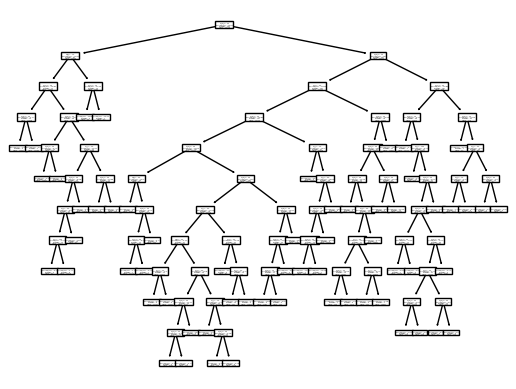

In [26]:
from sklearn import tree

tree.plot_tree(dtr)
plt.show()

The decision tree models for predicting final grades (G3) in both Math and Portuguese show mixed results. For Math, the MAE was 3.50, and the MSE was 23.89, indicating a moderate level of error in the predictions. Similarly, for Portuguese, the MAE was 2.36, and the MSE was 9.82, which is an improvement over Math, although the performance is still suboptimal. Both models achieved an R² score of 1.0 on the training data, which suggests perfect fit, but both had negative R² scores on the test data, implying that the models fail to generalize well to unseen data. This indicates that the decision tree models are overfitting the training data, memorizing it rather than learning the underlying patterns for accurate predictions.

### Linear Regression Section

This section is currently a work in progress, just to see how it would look like in Linear Regression. Feel free to edit!

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
#For Linear
LiR_data = pd.read_csv(cleaned_file_path)

NameError: name 'cleaned_file_path' is not defined

### Port Individual Section

In [ ]:
#Weekend/Weekday consumption towards final grade in Portuguese
print(LiR_data[['Dalc_port', 'Walc_port', 'G3_port']].describe())

        Dalc_port   Walc_port     G3_port
count  382.000000  382.000000  382.000000
mean     1.476440    2.290576   12.515707
std      0.886303    1.282577    2.945438
min      1.000000    1.000000    0.000000
25%      1.000000    1.000000   11.000000
50%      1.000000    2.000000   13.000000
75%      2.000000    3.000000   14.000000
max      5.000000    5.000000   19.000000


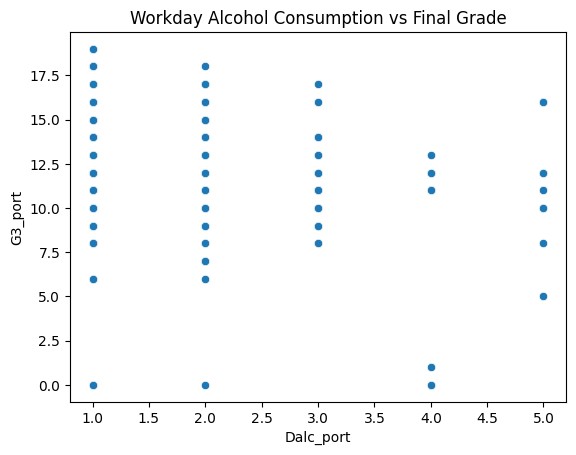

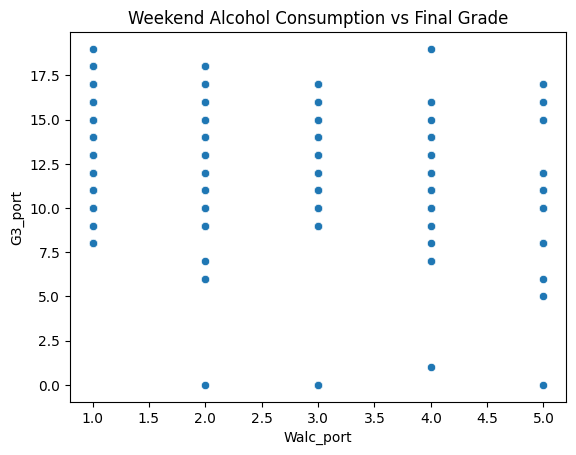

In [ ]:
#Initial Port first than merged or Mat. This is just for visualizing relations.
sns.scatterplot(x=LiR_data['Dalc_port'], y=LiR_data['G3_port'])
plt.title('Workday Alcohol Consumption vs Final Grade')
plt.show()

sns.scatterplot(x=LiR_data['Walc_port'], y=LiR_data['G3_port'])
plt.title('Weekend Alcohol Consumption vs Final Grade')
plt.show()


### 2D Dalc vs G3

In [ ]:
# Work day split
X_port = LiR_data[['Dalc_port']]
y_port = LiR_data['G3_port']

X_train, X_test, y_train, y_test = train_test_split(X_port, y_port, test_size=0.2, random_state=42)

# Create/Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Metrics

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Check the coefficients of Dalc to understand their impact on G3.
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 8.812239786181625
R-squared: 0.0642972582780389
Coefficients: [-0.88556057]
Intercept: 13.923333426738028


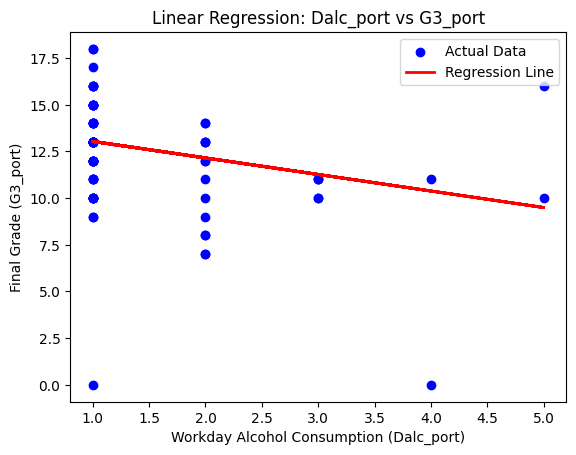

In [ ]:
# Scatter plot of the actual data
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Workday Alcohol Consumption (Dalc_port)')
plt.ylabel('Final Grade (G3_port)')
plt.title('Linear Regression: Dalc_port vs G3_port')
plt.legend()
plt.show()

### 3D Dalc, Walc, and G3 Port

In [ ]:
#Split data

X_port = LiR_data[['Dalc_port', 'Walc_port']]
y_port = LiR_data['G3_port']

X_train, X_test, y_train, y_test = train_test_split(X_port, y_port, test_size=0.2, random_state=42)


In [ ]:
# Create/Train model

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Metrics

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 8.989946623009155
R-squared: 0.04542796074678013


In [ ]:
# Check the coefficients of Dalc and Walc to understand their impact on G3.
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [-0.61787861 -0.28707675]
Intercept: 14.194723800756595


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


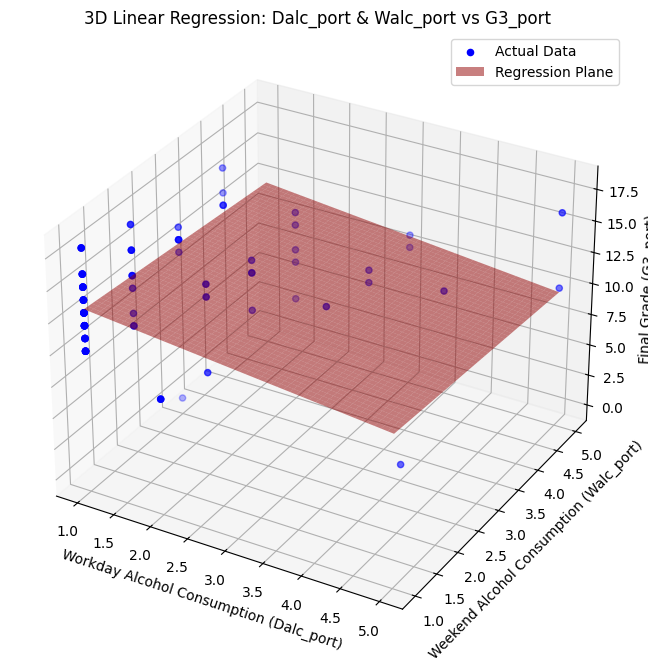

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Meshgrid for 3D plotting
Dalc_vals, Walc_vals = numpy.meshgrid(
    numpy.linspace(X_port['Dalc_port'].min(), X_port['Dalc_port'].max(), 50),
    numpy.linspace(X_port['Walc_port'].min(), X_port['Walc_port'].max(), 50)
)

# Predict G3_port for the grid values
Z = model.predict(numpy.c_[Dalc_vals.ravel(), Walc_vals.ravel()]).reshape(Dalc_vals.shape)

# Plot the data points and the regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(X_test['Dalc_port'], X_test['Walc_port'], y_test, color='blue', label='Actual Data')

# Regression plane
ax.plot_surface(Dalc_vals, Walc_vals, Z, color='red', alpha=0.5, label='Regression Plane')

# Labels and title
ax.set_xlabel('Workday Alcohol Consumption (Dalc_port)')
ax.set_ylabel('Weekend Alcohol Consumption (Walc_port)')
ax.set_zlabel('Final Grade (G3_port)')
ax.set_title('3D Linear Regression: Dalc_port & Walc_port vs G3_port')
plt.legend()
plt.show()


### Naive Bayes

Assuming Multinomial due to frequency of drinking? Anyways

In [ ]:
# Data is cleaned so i guess we go straight into it.
# visual_df_dropped
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
# G2 and G3 were dropped
X = visual_df_dropped #Highly corr features noped
y = visual_df['G3'] #For final grade

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Instantiate and fit the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predict and evaluate
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.23369565217391305
Classification Report:
               precision    recall  f1-score   support

           0       0.30      1.00      0.46        12
           5       0.00      0.00      0.00         2
           6       0.67      0.50      0.57         4
           7       0.00      0.00      0.00         5
           8       0.25      0.06      0.10        17
           9       0.05      0.10      0.07        10
          10       0.26      0.28      0.27        32
          11       0.23      0.23      0.23        30
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00        15
          14       0.21      0.40      0.28        10
          15       0.31      0.33      0.32        15
          16       0.67      0.25      0.36         8
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00        10
          19       0.00      0.00      0.00         1

    accuracy              

d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Testing, this one has 0.25 Accuracy but we're not exactly aiming for high scores, just need to answer the questions.
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import classification_report, accuracy_score
# G2 and G3 were dropped
#X = df_student.drop(columns=['G3']) #Just G2 gone
#y = df_student['G3'] #For final grade

# Split data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and fit the model
#nb_model = MultinomialNB()
#nb_model.fit(X_train, y_train)

# Predict and evaluate
#y_pred = nb_model.predict(X_test)
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Feature Impact
# Chi-Squared Test??? Find most relevant features for G3

from sklearn.feature_selection import chi2

chi_scores, p_values = chi2(X_train, y_train)
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Chi-Squared': chi_scores})
feature_scores = feature_scores.sort_values(by='Chi-Squared', ascending=False)
print(feature_scores)


              Feature  Chi-Squared
26           absences   538.045956
27                 G1   284.895009
11           failures   137.569430
24               Walc    30.377117
36       Fjob_teacher    26.237902
12          schoolsup    24.973919
29        Mjob_health    24.683784
35      Fjob_services    22.656396
39  reason_reputation    19.957787
6                Medu    19.247141
37        reason_home    18.688018
28            subject    18.091108
19           romantic    17.403064
7                Fedu    16.738528
23               Dalc    15.858434
31      Mjob_services    15.388807
15         activities    15.110113
14               paid    14.417034
32       Mjob_teacher    14.353301
0              school    13.456146
4             famsize    13.013481
38       reason_other    12.436948
34         Fjob_other    12.380177
33        Fjob_health    11.058767
22              goout    10.979739
10          studytime     9.922156
21           freetime     9.882614
25             healt

In [ ]:
# Permuted Feature Importance: Feature importance via permutation with trained model

from sklearn.inspection import permutation_importance

importance = permutation_importance(nb_model, X_test, y_test, n_repeats=30, random_state=42)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance.importances_mean})
print(feature_importance.sort_values(by='Importance', ascending=False))


              Feature  Importance
26           absences    0.090217
27                 G1    0.065399
11           failures    0.023732
29        Mjob_health    0.017391
14               paid    0.014493
30         Mjob_other    0.013587
9          traveltime    0.009420
6                Medu    0.009239
7                Fedu    0.009058
37        reason_home    0.007971
20             famrel    0.007790
13             famsup    0.007790
28            subject    0.006884
2                 age    0.006703
22              goout    0.006159
0              school    0.006159
24               Walc    0.005435
21           freetime    0.004348
23               Dalc    0.003442
25             health    0.003261
15         activities    0.003080
38       reason_other    0.003080
4             famsize    0.002717
39  reason_reputation    0.002536
34         Fjob_other    0.002355
35      Fjob_services    0.002174
19           romantic    0.002174
12          schoolsup    0.001812
31      Mjob_s

So absences, G1, and Failures dominant features. for impacting G3 -- These are features that have the strongest impact on final grade (Question 1)

G3 corr with walc and dalc.

In [ ]:
print(visual_df[['Dalc', 'Walc', 'G3']].corr())


          Dalc      Walc        G3
Dalc  1.000000  0.614092 -0.091314
Walc  0.614092  1.000000 -0.101529
G3   -0.091314 -0.101529  1.000000


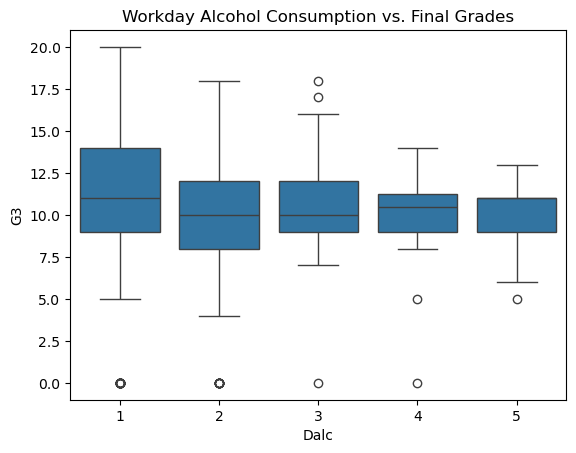

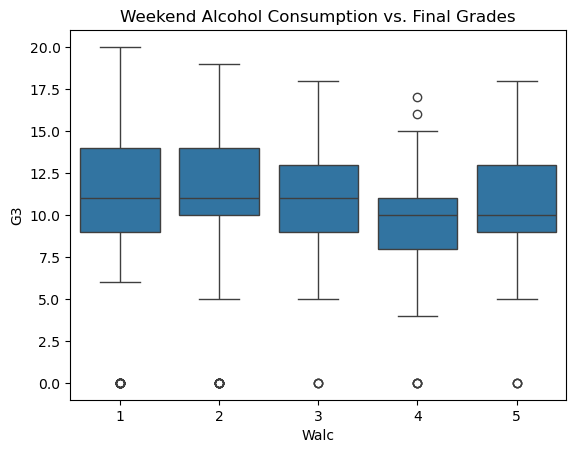

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Workday Alcohol Consumption
sns.boxplot(x='Dalc', y='G3', data=visual_df)
plt.title("Workday Alcohol Consumption vs. Final Grades")
plt.show()

# Boxplot for Weekend Alcohol Consumption
sns.boxplot(x='Walc', y='G3', data=visual_df)
plt.title("Weekend Alcohol Consumption vs. Final Grades")
plt.show()


#### Q2 in a way
#### Workday Alcohol Consumption (Dalc)
- Students with lower workday alcohol consumption (Dalc=1 or 2) tend to have slightly higher median final grades.
- As workday alcohol consumption increases (Dalc=4 or 5), median grades appear to decline, with more outliers scoring low.
- The spread of grades is broader for lower levels of alcohol consumption, suggesting more variability.
#### Weekend Alcohol Consumption (Walc)
- Similar to workday trends, students with lower weekend alcohol consumption (Walc=1 or 2) tend to perform better, with higher median grades.
- Higher weekend alcohol consumption (Walc=4 or 5) is associated with lower grades, and the variability decreases.

## 7. Error Analysis


### Decision Trees

Initial Error Report

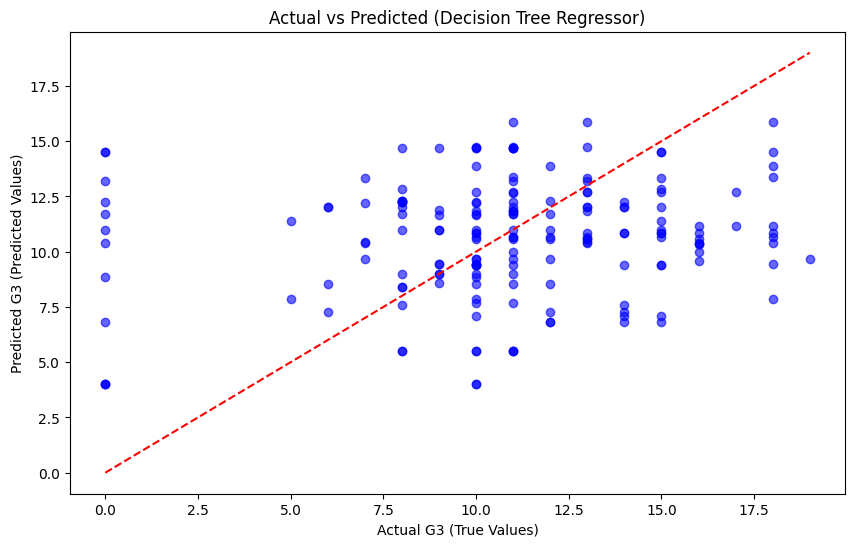

In [ ]:
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tree, y_pred_tree, color='blue', alpha=0.6)
plt.plot([min(y_test_tree), max(y_test_tree)], [min(y_test_tree), max(y_test_tree)], color='red', linestyle='--')  # Perfect prediction line
plt.title("Actual vs Predicted (Decision Tree Regressor)")
plt.xlabel("Actual G3 (True Values)")
plt.ylabel("Predicted G3 (Predicted Values)")
plt.show()

Idnetifying Instances of High Error

In [ ]:
# Reset the index of y_test_tree to ensure it's integer-based
y_test_tree = y_test_tree.reset_index(drop=True)
errors_tree = abs(y_test_tree - y_pred_tree)

# Set the threshold for high errors (e.g., threshold = 5)
threshold = 5

# Find indices where errors exceed the threshold
high_error_indices_tree = np.where(errors_tree > threshold)[0]

# Display the high error instances
print(f'High error instances for G3 predictions (Threshold = {threshold})')
for idx in high_error_indices_tree:
    print(f'Instance {idx}: Actual = {y_test_tree.iloc[idx]}, Predicted = {y_pred_tree[idx]}, Error = {errors_tree[idx]:.2f}')


High error instances for G3 predictions (Threshold = 5)
Instance 0: Actual = 11, Predicted = 5.5, Error = 5.50
Instance 9: Actual = 18, Predicted = 7.875, Error = 10.12
Instance 13: Actual = 5, Predicted = 11.4, Error = 6.40
Instance 14: Actual = 17, Predicted = 11.166666666666666, Error = 5.83
Instance 15: Actual = 0, Predicted = 8.857142857142858, Error = 8.86
Instance 17: Actual = 15, Predicted = 7.111111111111111, Error = 7.89
Instance 20: Actual = 6, Predicted = 12.0, Error = 6.00
Instance 22: Actual = 16, Predicted = 10.375, Error = 5.62
Instance 24: Actual = 18, Predicted = 10.375, Error = 7.62
Instance 25: Actual = 19, Predicted = 9.666666666666666, Error = 9.33
Instance 33: Actual = 11, Predicted = 5.5, Error = 5.50
Instance 34: Actual = 14, Predicted = 7.571428571428571, Error = 6.43
Instance 39: Actual = 0, Predicted = 10.375, Error = 10.38
Instance 50: Actual = 9, Predicted = 14.7, Error = 5.70
Instance 52: Actual = 16, Predicted = 10.555555555555555, Error = 5.44
Instance 

Error Visualization

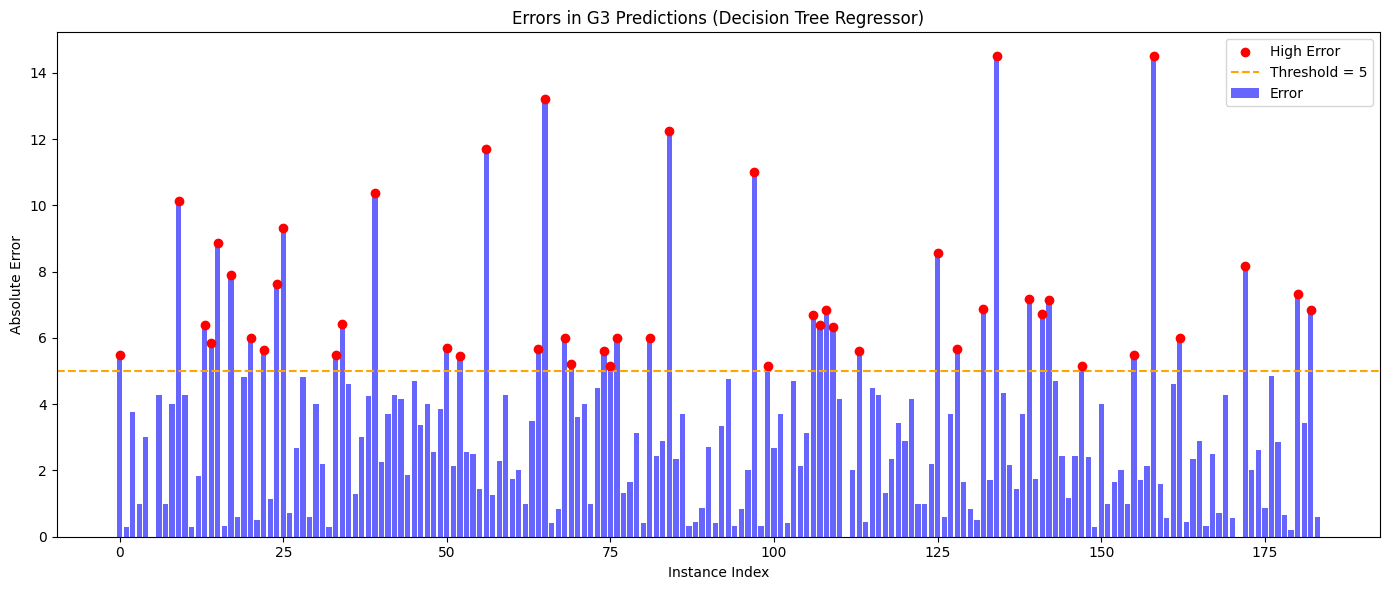

In [ ]:
plt.figure(figsize=(14, 6))

# Plot for G3 predictions
plt.bar(range(len(errors_tree)), errors_tree, color='blue', alpha=0.6, label='Error')
plt.scatter(high_error_indices_tree, errors_tree[high_error_indices_tree], color='red', label='High Error', zorder=5)
plt.axhline(threshold, color='orange', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Errors in G3 Predictions (Decision Tree Regressor)')
plt.xlabel('Instance Index')
plt.ylabel('Absolute Error')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Instances with Errors Visualization

## 8. Improving Model Performance


              Feature  Importance
11           failures    0.093841
8            guardian    0.093113
6                Medu    0.082312
24               Walc    0.067445
23               Dalc    0.063079
26           absences    0.056628
19           romantic    0.053257
7                Fedu    0.051919
1                 sex    0.051497
25             health    0.048553
3             address    0.046725
20             famrel    0.043826
21           freetime    0.034846
34      Fjob_services    0.033700
22              goout    0.033125
0              school    0.027443
15         activities    0.024042
30      Mjob_services    0.021830
16            nursery    0.020301
38  reason_reputation    0.013566
33         Fjob_other    0.009858
2                 age    0.008368
27            subject    0.007897
14               paid    0.007661
4             famsize    0.005168
9          traveltime    0.000000
5             Pstatus    0.000000
17             higher    0.000000
28        Mjob

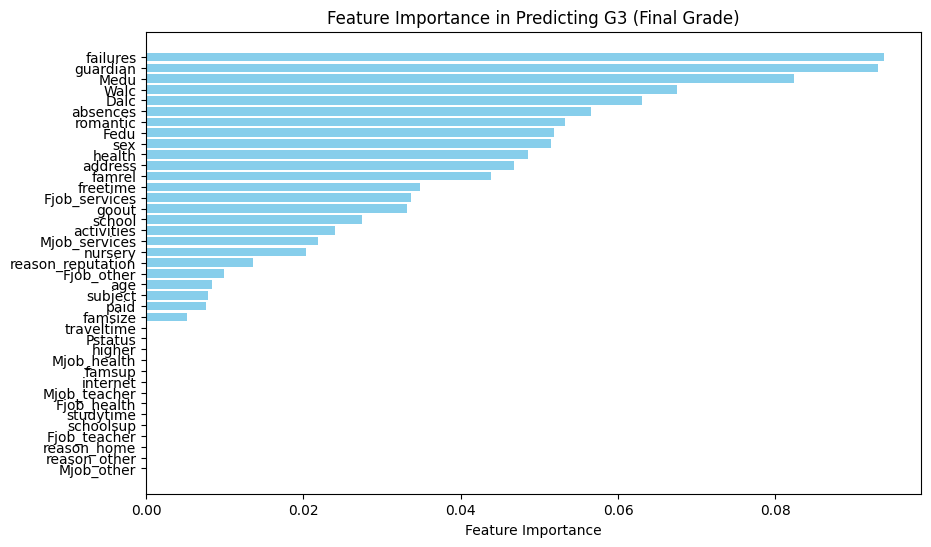

In [ ]:
#Before Model Improvements
importances = dtr.feature_importances_ 
feature_names = X_tree.columns 

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting G3 (Final Grade)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


### Decision Trees

The method we will be using to improve the overall model performance is the `Random Search` method. This is a hyperparameter method that uses random combinations of the hyperparameters to find the best solution. We used this over grid search because it doesn't search through all possible combinations, when there are many different features used.

In [30]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters grid
hyperparameters = {
    'min_impurity_decrease': [0, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.1],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 50],
    'min_samples_split': [2, 4, 6, 10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 4, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 3, 5, 10, 20, 50, 100, 150, 200],
}

dtr = DecisionTreeRegressor(random_state=42)

# Set up RandomizedSearchCV for hyperparameter tuning
random_search_tree = RandomizedSearchCV(
    estimator=dtr,
    param_distributions=hyperparameters,
    n_iter=50, 
    cv=5,
    random_state=42,
    n_jobs=-1 
)

Afterwards both the new models get trained on the training data

In [31]:
random_search_tree.fit(X_train_tree, y_train_tree)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 3, 5, 10, 20,
                                                           50, 100, 150, 200],
                                        'min_impurity_decrease': [0, 0.001,
                                                                  0.01, 0.05,
                                                                  0.1, 0.3, 0.5,
                                                                  0.7, 0.1],
                                        'min_samples_leaf': [1, 2, 4, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 4, 6, 10, 15,
                                                              20, 25],
                                        'splitter': ['best', 'random']},
                   random_state=42)

Then upon finding the best hyperparameters for both of them, we make a new estimator and train the new estimators on our data

In [32]:
best_hyperparameters_tree = random_search_tree.best_params_
dtr_best = DecisionTreeRegressor(**best_hyperparameters_tree)
dtr_best.fit(X_train_tree, y_train_tree)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=3, min_impurity_decrease=0.3,
                      min_samples_leaf=4)

Lastly, we get the new predictions and the MSE, MAE, and R²

In [33]:
y_pred_tree_best = dtr_best.predict(X_test_tree)

mae_tree_best = mean_absolute_error(y_test_tree, y_pred_tree_best)
mse_tree_best = mean_squared_error(y_test_tree, y_pred_tree_best)
r2_tree_best = r2_score(y_test_tree, y_pred_tree_best)

print(f"Mean Absolute Error (MAE): {mae_tree_best:.2f}")
print(f"Mean Squared Error (MSE): {mse_tree_best:.2f}")
print(f"R² Score: {r2_tree_best:.2f}")

Mean Absolute Error (MAE): 2.68
Mean Squared Error (MSE): 11.89
R² Score: 0.31


Visualization

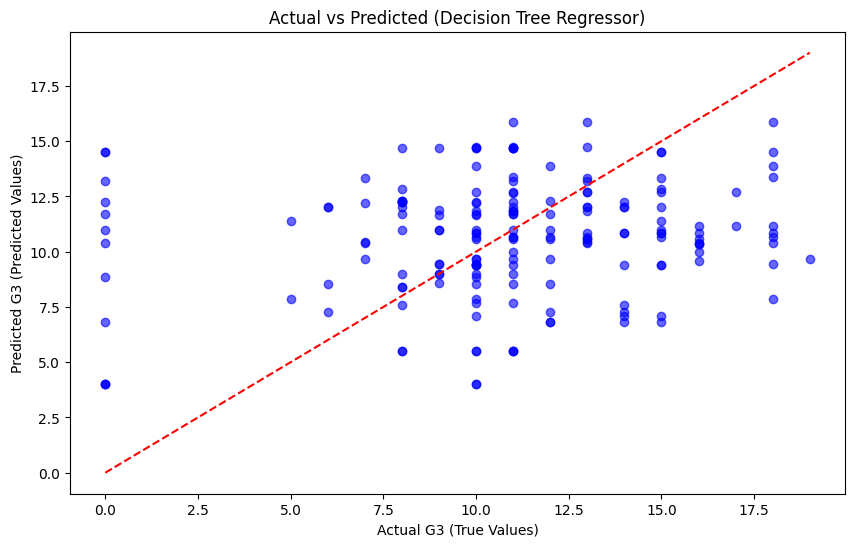

In [34]:
# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_tree, y_pred_tree, color='blue', alpha=0.6)
plt.plot([min(y_test_tree), max(y_test_tree)], [min(y_test_tree), max(y_test_tree)], color='red', linestyle='--')  # Perfect prediction line
plt.title("Actual vs Predicted (Decision Tree Regressor)")
plt.xlabel("Actual G3 (True Values)")
plt.ylabel("Predicted G3 (Predicted Values)")
plt.show()

Feature Importance Extraction

              Feature  Importance
11           failures    0.695751
26           absences    0.304249
0              school    0.000000
20             famrel    0.000000
22              goout    0.000000
23               Dalc    0.000000
24               Walc    0.000000
25             health    0.000000
27            subject    0.000000
28        Mjob_health    0.000000
29         Mjob_other    0.000000
30      Mjob_services    0.000000
31       Mjob_teacher    0.000000
32        Fjob_health    0.000000
33         Fjob_other    0.000000
34      Fjob_services    0.000000
35       Fjob_teacher    0.000000
36        reason_home    0.000000
37       reason_other    0.000000
21           freetime    0.000000
19           romantic    0.000000
1                 sex    0.000000
18           internet    0.000000
2                 age    0.000000
3             address    0.000000
4             famsize    0.000000
5             Pstatus    0.000000
6                Medu    0.000000
7             

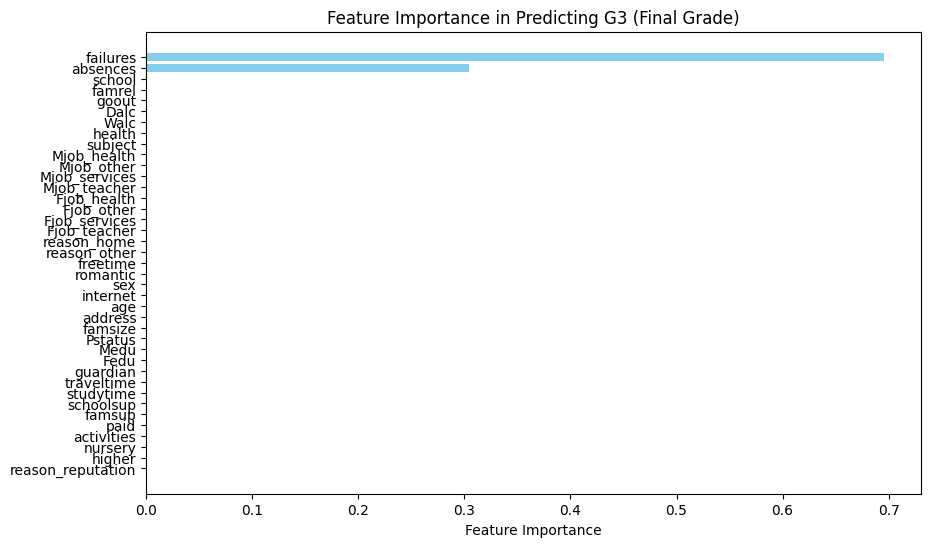

In [ ]:
importances = dtr_best.feature_importances_  
feature_names = X_tree.columns  

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting G3 (Final Grade)')
plt.gca().invert_yaxis() 
plt.show()
